<a href="https://colab.research.google.com/github/MrT3313/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS-Unit-1-Sprint-Challenge-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# TODO

In [0]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Part 1: Answers

In [0]:
# 1 # - Patient Data Url

patient_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

# - Inspect Data w/ !curl
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data

In [4]:
# 2 # - Load Data as a pandas dataFrame
patient_data = pd.read_csv(patient_data_url)
patient_data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [0]:
# 3 # - Initial Data Manipulation / Setup 

column_headers = [
  'age',
  'operation_year',
  'positive_axillary_nodes',
  'survival_status'
]

# age = INTEGER
# operation_year = INTEGER
# positive axillary nodes = INTEGER
# survival_status: 1 = survived >= 5 years / 2 = died in <= 5 years

In [6]:
# 4 # - Apply Initial Data Manipulation / Setup to dataFrame

patient_data = pd.read_csv(patient_data_url, names=column_headers)
patient_data.head()

,age,operation_year,positive_axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
# - Change 'survival_status' to CATEGORICAL from INTEGER
# patient_data['survival_status'] = patient_data['survival_status'].astype('category') 

In [8]:
# - Initial Data Exploration

## Validate number of observations -- should be 306
print(patient_data.shape)

## Check Data Types
print(patient_data.dtypes)

## Confirm there are no missing values
print(patient_data.isna().sum())

print(patient_data.describe())

## INITIAL NOTES:
  # -- Years of Data: 1958 - 1969 
  # -- Age Range: 30 - 83 w/ avg @ 52
  # -- Survival Status: More likely to die in <= 5 years than not



(306, 4)
age                        int64
operation_year             int64
positive_axillary_nodes    int64
survival_status            int64
dtype: object
age                        0
operation_year             0
positive_axillary_nodes    0
survival_status            0
dtype: int64
              age  operation_year  positive_axillary_nodes  survival_status
count  306.000000      306.000000               306.000000       306.000000
mean    52.457516       62.852941                 4.026144         1.264706
std     10.803452        3.249405                 7.189654         0.441899
min     30.000000       58.000000                 0.000000         1.000000
25%     44.000000       60.000000                 0.000000         1.000000
50%     52.000000       63.000000                 1.000000         1.000000
75%     60.750000       65.750000                 4.000000         2.000000
max     83.000000       69.000000                52.000000         2.000000


In [9]:
# - Print the first 5 rows
patient_data.head()

,age,operation_year,positive_axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

## Part 2: Answers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f593a6e8278>,
      dtype=object)

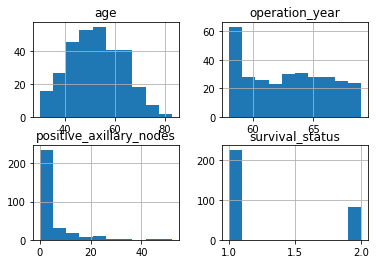

In [10]:
# 1 # - Initial Data Visualization

patient_data.hist()

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


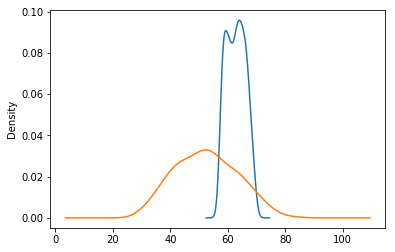

In [11]:
# - Density Analysis
print(patient_data['operation_year'].plot.density())
print(patient_data['age'].plot.density())

AxesSubplot(0.125,0.125;0.775x0.755)


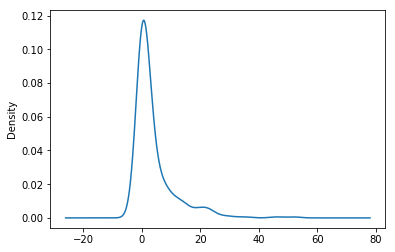

In [12]:
print(patient_data['positive_axillary_nodes'].plot.density())

In [0]:
# 2 # - Bin Data
age_bins = pd.cut(patient_data['age'],5)
year_bins = pd.cut(patient_data['operation_year'],5)
axillary_node_bins = pd.cut(patient_data['positive_axillary_nodes'], 5)


In [14]:
# - Visualize Data w/ data bins
print(pd.crosstab(age_bins, patient_data['survival_status']))
pd.crosstab(age_bins, patient_data['survival_status'], normalize='index')



survival_status   1   2
age                    
(29.947, 40.6]   39   4
(40.6, 51.2]     68  31
(51.2, 61.8]     69  27
(61.8, 72.4]     43  16
(72.4, 83.0]      6   3


survival_status,1,2
age,,
"(29.947, 40.6]",0.906977,0.093023
"(40.6, 51.2]",0.686869,0.313131
"(51.2, 61.8]",0.718750,0.281250
"(61.8, 72.4]",0.728814,0.271186
"(72.4, 83.0]",0.666667,0.333333


In [15]:
print(pd.crosstab(year_bins, patient_data['survival_status']))
pd.crosstab(year_bins, patient_data['survival_status'], normalize='index')

survival_status   1   2
operation_year         
(57.989, 60.2]   66  25
(60.2, 62.4]     39  10
(62.4, 64.6]     45  16
(64.6, 66.8]     37  19
(66.8, 69.0]     38  11


survival_status,1,2
operation_year,,
"(57.989, 60.2]",0.725275,0.274725
"(60.2, 62.4]",0.795918,0.204082
"(62.4, 64.6]",0.737705,0.262295
"(64.6, 66.8]",0.660714,0.339286
"(66.8, 69.0]",0.775510,0.224490


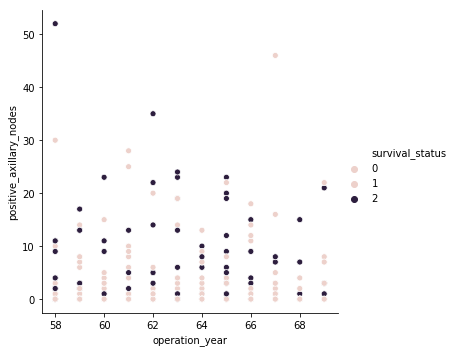

In [16]:
sns.relplot(x='operation_year', y='positive_axillary_nodes', hue='survival_status', data=patient_data)

# ?? # 
# -- Documentation: https://seaborn.pydata.org/generated/seaborn.relplot.html
# -- ^ states that the 'hue' argument can be a categorical value
## -- see [7] where I am setting the data type for 'sutvival_status'
# -- given that 'survival_status is either a 1 or 2 why doed the label have a 0'

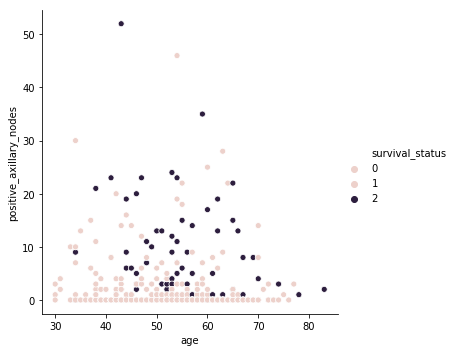

In [17]:
sns.relplot(x='age', y='positive_axillary_nodes', hue='survival_status', data=patient_data)

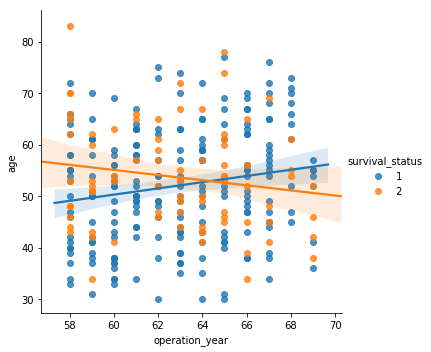

In [18]:
sns.lmplot(x='operation_year', y='age', hue='survival_status', data=patient_data)

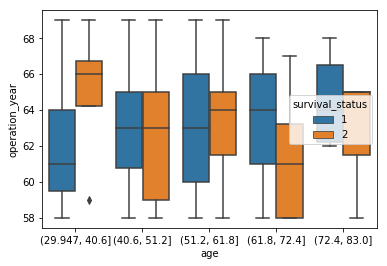

In [19]:
sns.boxplot(x=age_bins, y='operation_year', hue='survival_status', data=patient_data)

In [0]:
# TODO

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

# Part 3: Answers

1) The number of positive auxillary nodes is positivly correlated with survival status --> more nodes = higher chance of survival

2) Age especially 60+ / 65+ seems to have a negative correlation with survival status

3) The majority of positive axillary nodes detected through the study are concentrated between 40 - 65.